In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")

In [2]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-3-4 Python-3.12.1 torch-2.6.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img = "https://ultralytics.com/images/zidane.jpg"

In [5]:
result = model(img)

In [6]:
type(result)

models.common.Detections

In [7]:
result.print()

image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 4580.3ms pre-process, 161.1ms inference, 16.7ms NMS per image at shape (1, 3, 384, 640)


In [13]:
result.render()

[array([[[76, 51, 44],
         [75, 50, 43],
         [73, 48, 41],
         ...,
         [54, 18, 20],
         [52, 16, 18],
         [51, 15, 17]],
 
        [[76, 51, 44],
         [75, 50, 43],
         [73, 48, 41],
         ...,
         [54, 18, 20],
         [52, 16, 18],
         [52, 16, 18]],
 
        [[76, 51, 44],
         [75, 50, 43],
         [73, 48, 41],
         ...,
         [57, 18, 21],
         [55, 16, 19],
         [54, 15, 18]],
 
        ...,
 
        [[40, 44, 53],
         [39, 43, 52],
         [38, 42, 51],
         ...,
         [38, 50, 50],
         [39, 51, 51],
         [40, 52, 52]],
 
        [[40, 44, 53],
         [39, 43, 52],
         [38, 42, 51],
         ...,
         [38, 50, 50],
         [39, 51, 51],
         [40, 52, 52]],
 
        [[40, 44, 53],
         [39, 43, 52],
         [38, 42, 51],
         ...,
         [37, 49, 49],
         [39, 51, 51],
         [40, 52, 52]]], dtype=uint8)]

In [8]:
np.array(result.render()).shape

(1, 720, 1280, 3)

In [9]:
np.squeeze(result.render()).shape

(720, 1280, 3)

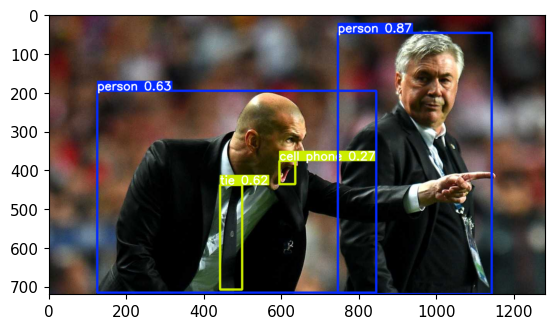

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [11]:
result.xyxy
#x1, y1, x2, y2, probability, class

[tensor([[7.45579e+02, 4.84703e+01, 1.14269e+03, 7.20000e+02, 8.68910e-01, 0.00000e+00],
         [1.24744e+02, 1.97335e+02, 8.44397e+02, 7.16651e+02, 6.30327e-01, 0.00000e+00],
         [4.41239e+02, 4.39351e+02, 4.98381e+02, 7.08571e+02, 6.16793e-01, 2.70000e+01],
         [5.94082e+02, 3.77300e+02, 6.35424e+02, 4.37148e+02, 2.74013e-01, 6.70000e+01]])]

In [12]:
img = "https://p1.pxfuel.com/preview/286/994/340/traffic-road-highway-way-busy-cars.jpg"
result = model(img)
result.print()

image 1/1: 1365x910 1 person, 18 cars, 3 trucks
Speed: 1339.9ms pre-process, 179.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 448)


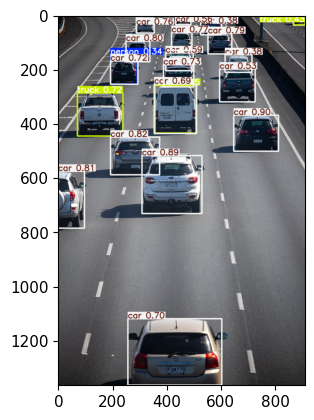

In [13]:
plt.imshow(np.squeeze(result.render()))
plt.show()

# Real Time Detection

In [14]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow("YOLO", np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

cv2.waitKey waits for the arg passed no. of ms or until key press before destroying the window displaying img.
In the given code, we wait for 10 ms for each frame and until q key is pressed.
so for ex. if we pass 1000 to the waitkey func, it will show frame for 1 s which will show broken vid.

In [15]:
cap = cv2.VideoCapture("C:\Vinaya\Drowsiness Detection\856787-hd_1920_1080_30fps.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow("YOLO", np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

# Training Model

In [3]:
import uuid #used for unique identifier. collect img in real time and name them
import os
import time

In [7]:
img_path = os.path.join("data", "images")
img_path

'data\\images'

In [8]:
labels = ["drowsy", "awake"]
num_img = 20 

In [ ]:
cap = cv2.VideoCapture(0)
flag = 1
while cap.isOpened() and flag:
    for label in labels:
        print(f"Capturing images for label {label}")
        time.sleep(5)
        for num in range(num_img):
            print(f"Capturing image {num+1} for {label}")
            time.sleep(2)
            
            ret, frame = cap.read()
            
            img_name = label+"-"+str(uuid.uuid1())+".jpg"
            cv2.imshow("Dataset", frame)
            cv2.imwrite(os.path.join(img_path, img_name), frame)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                flag = 0
                break
                
        if not flag:
            break

    if not flag:
        break
    
            
cap.realease()
cv2.destroyAllWindows()

Capturing images for label drowsy
Capturing image 1 for drowsy
Capturing image 2 for drowsy
Capturing image 3 for drowsy
Capturing image 4 for drowsy
Capturing image 5 for drowsy
Capturing image 6 for drowsy
Capturing image 7 for drowsy
Capturing image 8 for drowsy
Capturing image 9 for drowsy
Capturing image 10 for drowsy
Capturing image 11 for drowsy
Capturing image 12 for drowsy
Capturing image 13 for drowsy
Capturing image 14 for drowsy
Capturing image 15 for drowsy
Capturing image 16 for drowsy
Capturing image 17 for drowsy
Capturing image 18 for drowsy
Capturing image 19 for drowsy
Capturing image 20 for drowsy
Capturing images for label awake
Capturing image 1 for awake
Capturing image 2 for awake
Capturing image 3 for awake
Capturing image 4 for awake
Capturing image 5 for awake
Capturing image 6 for awake
Capturing image 7 for awake
Capturing image 8 for awake
Capturing image 9 for awake
Capturing image 10 for awake
Capturing image 11 for awake
Capturing image 12 for awake
Cap

In [34]:
"drowsy labelled as 0, awake labelled as 1"
x_center = 0.5
y_center = 0.5
width = 1.0
height = 1.0

In [35]:
import os
drowsy_folder = "C:\Vinaya\Drowsiness Detection\dataset\Driver Drowsiness Dataset (DDD)\Drowsy"
label_folder = "C:\Vinaya\Drowsiness Detection\dataset\labels"
for image in os.listdir(drowsy_folder):
    label_path = os.path.join(label_folder, "drowsy-"+image.replace("png", "txt"))
    content = "0 0.5 0.5 1.0 1.0"
    with open(label_path, "w") as file:
        file.write(content)

In [38]:
nondrowsy_folder = "C:\\Vinaya\\Drowsiness Detection\\dataset\\Driver Drowsiness Dataset (DDD)\\Non Drowsy"
label_folder = "C:\Vinaya\Drowsiness Detection\dataset\labels"
for image in os.listdir(nondrowsy_folder):
    label_path = os.path.join(label_folder, "awake-"+image.replace("png", "txt"))
    content = "1 0.5 0.5 1.0 1.0"
    with open(label_path, "w") as file:
        file.write(content)

In [ ]:
!cd yolov5 && python train.py --img 227 --batch 10 --epochs 10 --data "C:\Vinaya\Drowsiness Detection\dataset.yml" --weights yolov5s.pt

In [ ]:
2+7